# Importing necessary libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [22]:
file_path = '/content/sample_data/amazon_sales.csv'
df = pd.read_csv(file_path)

# Displaying some columns

In [25]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [27]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

# Data Cleaning and Preprocessing

In [28]:
df.fillna(method='ffill', inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

# Ensuring Total Revenue column is numeric

In [31]:
print(df['Total Revenue'].head())
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'], errors='coerce')

non_numeric_revenue = df['Total Revenue'].isna().sum()

# Drop rows with non-numeric 'Total Revenue'
df.dropna(subset=['Total Revenue'], inplace=True)

0    2533654.00
1     576782.80
2    1158502.59
3      75591.66
4    3296425.02
Name: Total Revenue, dtype: float64


# Monthly Sales Trend

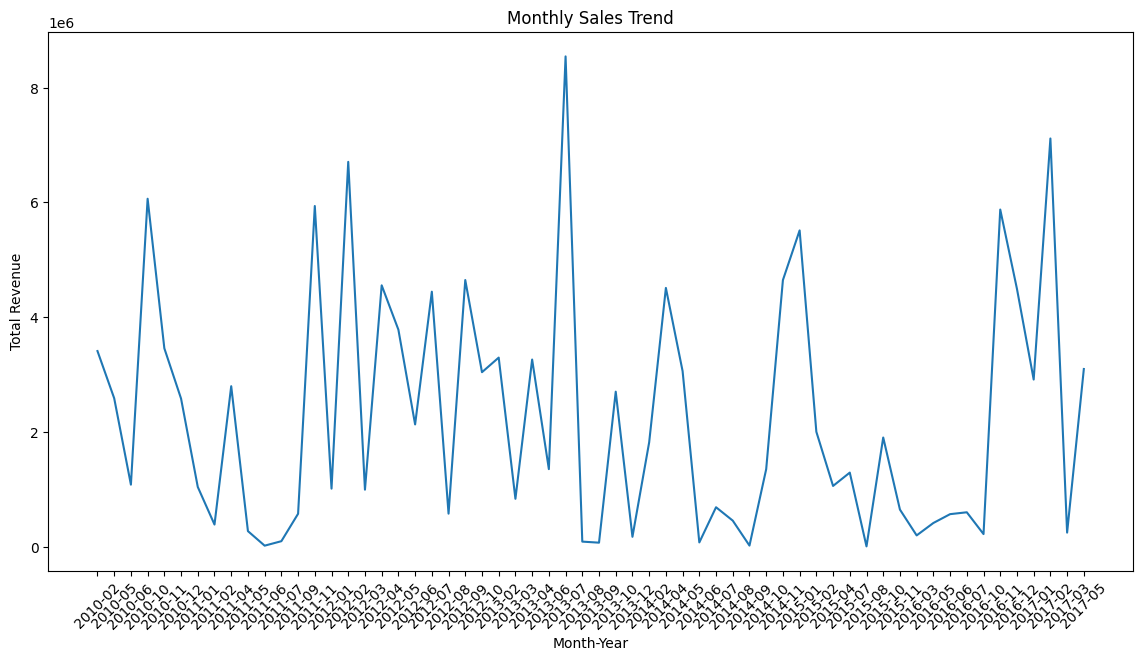

In [32]:
# Extract year and month for trend analysis
df['year_month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('year_month')['Total Revenue'].sum().reset_index()

# Plot Monthly Sales Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='year_month', y='Total Revenue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Yearly Sales Trend

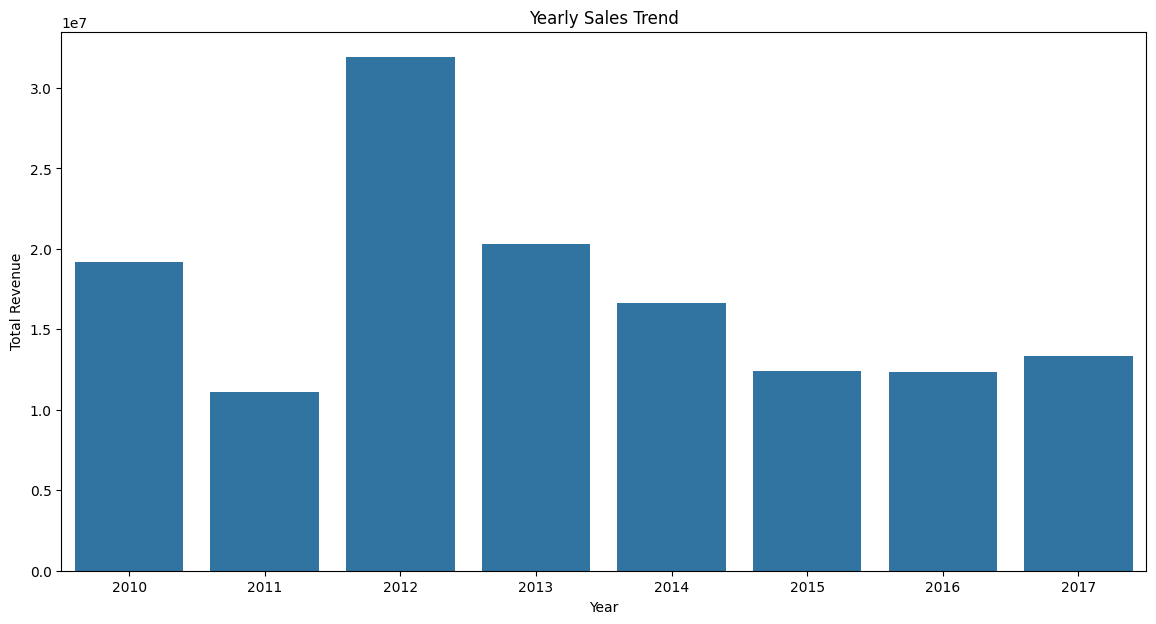

In [33]:
df['year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('year')['Total Revenue'].sum().reset_index()

# Plot Yearly Sales Trend
plt.figure(figsize=(14, 7))
sns.barplot(data=yearly_sales, x='year', y='Total Revenue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()


# Yearly-Monthly Sales Trend

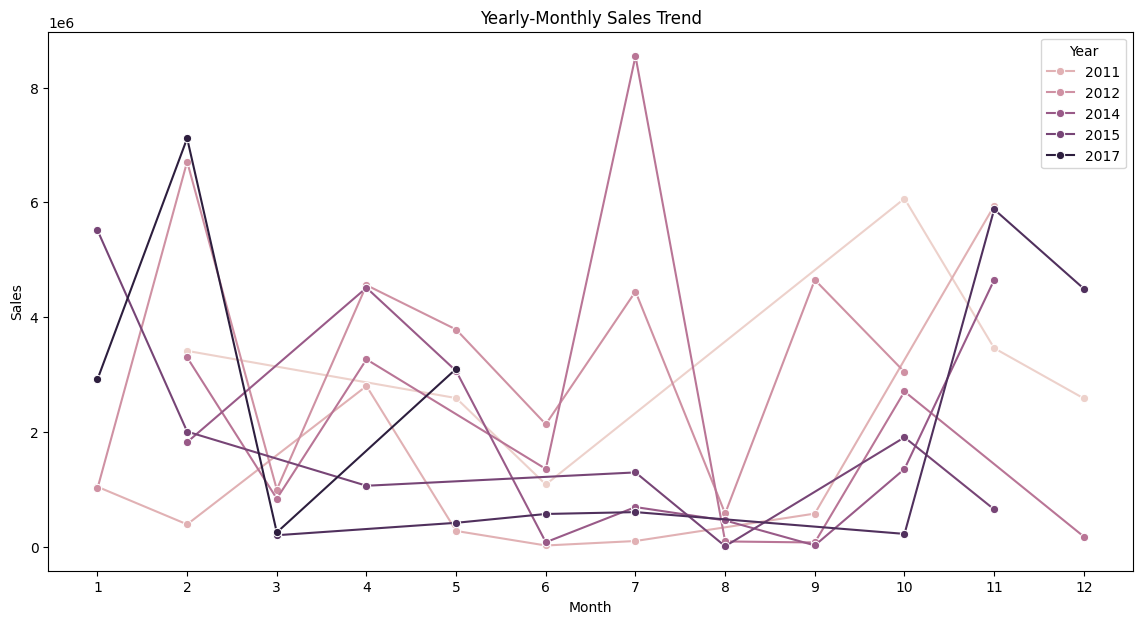

In [34]:
df['month'] = df['Order Date'].dt.month
yearly_monthly_sales = df.groupby(['year', 'month'])['Total Revenue'].sum().reset_index()
yearly_monthly_sales.columns = ['Year', 'Month', 'Sales']

# Plot Yearly-Monthly Sales Trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13))
plt.show()


# Key Metrics Calculation

In [17]:
# Calculating key metrics such as average sales, median sales, etc.
average_sales = df['Total Revenue'].mean()
median_sales = df['Total Revenue'].median()
total_sales = df['Total Revenue'].sum()

key_metrics = {
    "Average Sales": average_sales,
    "Median Sales": median_sales,
    "Total Sales": total_sales
}

print(key_metrics)


{'Average Sales': 1373487.6831, 'Median Sales': 752314.36, 'Total Sales': 137348768.31}


# Relationship Between Attributes

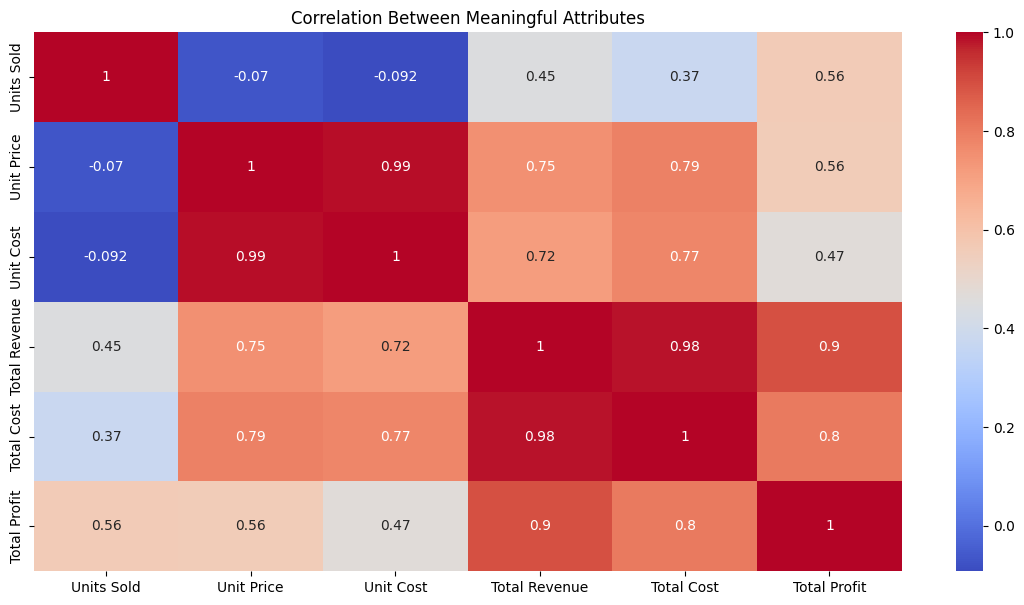

In [35]:
# Select only meaningful numeric columns for correlation
meaningful_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
numeric_df = df[meaningful_columns]

# Finding relationships between attributes
correlation_matrix = numeric_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Meaningful Attributes')
plt.show()

Conclusion:

After analyzing the Amazon sales data, several key findings can be highlighted:

1. Monthly Sales Trends:

  The monthly sales trend graph provides a clear picture of the fluctuations in total revenue over time.
  Peaks and troughs in sales can be identified, indicating periods of high and low sales activity.
  This information is valuable for understanding seasonal trends and planning inventory and marketing strategies accordingly.

2. Yearly Sales Trends:

  The yearly sales trend graph shows the overall growth or decline in total revenue year over year.
  This analysis helps in assessing the long-term performance of the business and evaluating the effectiveness of annual sales strategies.

3. Yearly-Monthly Sales Trends:

  The yearly-monthly sales trend graph combines both yearly and monthly perspectives, allowing for a detailed examination of sales performance across different months of each year.
  This granularity can help identify specific months that consistently perform well or poorly, providing insights for targeted promotions and sales campaigns.

4. Correlation Between Meaningful Attributes:

The correlation matrix highlights the relationships between key attributes such as Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, and Total Profit.

Significant positive correlations were found between:

    Units Sold and Total Revenue

    Units Sold and Total Profit

    Total Revenue and Total Profit

This indicates that higher units sold lead to higher revenue and profit, which is expected in a sales context.
Understanding these relationships can help in making data-driven decisions for pricing, cost management, and sales strategies.